In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data2_cleaned.csv')
data.head(3)

,Unnamed: 0,country,cpc_code,commodity,year,loss_percentage,activity,food_supply_stage
0,0,Myanmar,23161.02,"Rice, milled",2015,1.78,Storage,Storage
1,1,Myanmar,23161.02,"Rice, milled",2015,11.77,Storage,Storage
2,2,Myanmar,23161.02,"Rice, milled",2015,5.88,Storage,Storage


In [5]:
import pycountry_convert as pc
def get_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        return continent_code
    except KeyError:
        return None

data['continent'] = data['country'].apply(get_continent)
data.head(3)

,Unnamed: 0,country,cpc_code,commodity,year,loss_percentage,activity,food_supply_stage,continent
0,0,Myanmar,23161.02,"Rice, milled",2015,1.78,Storage,Storage,AS
1,1,Myanmar,23161.02,"Rice, milled",2015,11.77,Storage,Storage,AS
2,2,Myanmar,23161.02,"Rice, milled",2015,5.88,Storage,Storage,AS


In [7]:
africa_data = data[data['continent']=='AF'].reset_index(drop=True)
africa_data

,Unnamed: 0,country,cpc_code,commodity,year,loss_percentage,activity,food_supply_stage,continent
0,6,Burundi,0111,Wheat,2021,4.43333,"Drying, Harvesting",Harvest,AF
1,7,Burundi,0111,Wheat,2021,4.86667,Storage,Farm,AF
2,8,Burundi,0111,Wheat,2021,3.50000,"Shelling, Threshing",Not Recorded,AF
3,9,Burundi,0111,Wheat,2021,2.50000,Transportation,Farm,AF
4,10,Burundi,0112,Maize (corn),2021,6.42000,"Drying, Harvesting",Harvest,AF
...,...,...,...,...,...,...,...,...,...
20241,25411,Zambia,0118,Millet,2000,2.50000,Transportation,Farm,AF
20242,25412,Zambia,0118,Millet,2000,2.50000,Winnowing,Farm,AF
20243,25413,Zambia,0118,Millet,2000,2.38075,Storage,Storage,AF
20244,25414,Zambia,0118,Millet,2000,3.44008,"Drying, Harvesting",Harvest,AF


In [8]:
ea_data = africa_data.query("country == 'Burundi' or country == 'Democratic Republic of the Congo' or country == 'Kenya' or country == 'Rwanda' or country == 'Somalia' or country == 'South Sudan' or country == 'Uganda' or country == 'United Republic of Tanzania'").reset_index(drop=True)
ea_data

,Unnamed: 0,country,cpc_code,commodity,year,loss_percentage,activity,food_supply_stage,continent
0,6,Burundi,0111,Wheat,2021,4.43333,"Drying, Harvesting",Harvest,AF
1,7,Burundi,0111,Wheat,2021,4.86667,Storage,Farm,AF
2,8,Burundi,0111,Wheat,2021,3.50000,"Shelling, Threshing",Not Recorded,AF
3,9,Burundi,0111,Wheat,2021,2.50000,Transportation,Farm,AF
4,10,Burundi,0112,Maize (corn),2021,6.42000,"Drying, Harvesting",Harvest,AF
...,...,...,...,...,...,...,...,...,...
4539,22404,United Republic of Tanzania,0118,Millet,2000,2.16100,Winnowing,Farm,AF
4540,22405,United Republic of Tanzania,0118,Millet,2000,2.50000,Transportation,Farm,AF
4541,22406,United Republic of Tanzania,0118,Millet,2000,2.00000,"Shelling, Threshing",Not Recorded,AF
4542,22407,United Republic of Tanzania,0118,Millet,2000,1.08145,Storage,Farm,AF


In [9]:
#what are east africa's top five foods?
ea_top_five = ea_data.groupby('commodity')['loss_percentage'].count().sort_values(ascending=False).reset_index()
ea_top_five.head()

,commodity,loss_percentage
0,Maize (corn),1349
1,Rice,937
2,Sorghum,663
3,Millet,641
4,Wheat,548


In [10]:
ea_data_top = ea_data.query("commodity == 'Maize (corn)' or commodity == 'Rice' or commodity == 'Sorghum' or commodity == 'Millet' or commodity == 'Wheat'").reset_index(drop=True)
ea_data_top

,Unnamed: 0,country,cpc_code,commodity,year,loss_percentage,activity,food_supply_stage,continent
0,6,Burundi,0111,Wheat,2021,4.43333,"Drying, Harvesting",Harvest,AF
1,7,Burundi,0111,Wheat,2021,4.86667,Storage,Farm,AF
2,8,Burundi,0111,Wheat,2021,3.50000,"Shelling, Threshing",Not Recorded,AF
3,9,Burundi,0111,Wheat,2021,2.50000,Transportation,Farm,AF
4,10,Burundi,0112,Maize (corn),2021,6.42000,"Drying, Harvesting",Harvest,AF
...,...,...,...,...,...,...,...,...,...
4133,22404,United Republic of Tanzania,0118,Millet,2000,2.16100,Winnowing,Farm,AF
4134,22405,United Republic of Tanzania,0118,Millet,2000,2.50000,Transportation,Farm,AF
4135,22406,United Republic of Tanzania,0118,Millet,2000,2.00000,"Shelling, Threshing",Not Recorded,AF
4136,22407,United Republic of Tanzania,0118,Millet,2000,1.08145,Storage,Farm,AF


In [11]:
ea_data_grouped = ea_data.groupby('country')['loss_percentage'].mean().sort_values(ascending=False).reset_index(name='average_loss_percentage')
ea_data_grouped

,country,average_loss_percentage
0,United Republic of Tanzania,4.384186
1,Kenya,4.189101
2,Rwanda,4.020846
3,South Sudan,3.187216
4,Burundi,3.123368
5,Uganda,2.900561
6,Democratic Republic of the Congo,2.709282
7,Somalia,2.700580


In [12]:
ea_data_top_grouped = ea_data_top.groupby('country')['loss_percentage'].mean().sort_values(ascending=False).reset_index(name='average_loss_percentage')
ea_data_top_grouped

,country,average_loss_percentage
0,Kenya,3.673576
1,United Republic of Tanzania,3.506562
2,South Sudan,3.187216
3,Rwanda,3.146134
4,Burundi,3.123368
5,Uganda,2.884153
6,Democratic Republic of the Congo,2.709282
7,Somalia,2.700580


In [13]:
import geopandas as gpd
world = gpd.read_file("countries/ne_110m_admin_0_countries.shp")

In [14]:
ea_data1 = ea_data_top_grouped.merge(world, left_on='country', right_on='SOVEREIGNT', how='left')
ea_data1

,country,average_loss_percentage,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Kenya,3.673576,Admin-0 country,1,2,Kenya,KEN,0,2,Sovereign country,...,None,None,None,None,None,None,None,None,None,"POLYGON ((39.20222 -4.67677, 37.7669 -3.67712,..."
1,United Republic of Tanzania,3.506562,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,South Sudan,3.187216,Admin-0 country,1,3,South Sudan,SDS,0,2,Sovereign country,...,None,None,None,None,None,None,None,None,None,"POLYGON ((30.83385 3.50917, 29.9535 4.1737, 29..."
3,Rwanda,3.146134,Admin-0 country,1,3,Rwanda,RWA,0,2,Sovereign country,...,None,None,None,None,None,None,None,None,None,"POLYGON ((30.4191 -1.13466, 30.81613 -1.69891,..."
4,Burundi,3.123368,Admin-0 country,1,6,Burundi,BDI,0,2,Sovereign country,...,None,None,None,None,None,None,None,None,None,"POLYGON ((30.46967 -2.41385, 30.52766 -2.80762..."
5,Uganda,2.884153,Admin-0 country,1,3,Uganda,UGA,0,2,Sovereign country,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 31.86617 -1.02736, 3..."
6,Democratic Republic of the Congo,2.709282,Admin-0 country,1,2,Democratic Republic of the Congo,COD,0,2,Sovereign country,...,None,None,None,None,None,None,None,None,None,"POLYGON ((29.34 -4.49998, 29.51999 -5.41998, 2..."
7,Somalia,2.700580,Admin-0 country,1,6,Somalia,SOM,0,2,Sovereign country,...,None,None,None,None,None,None,None,None,None,"POLYGON ((41.58513 -1.68325, 40.993 -0.85829, ..."


In [15]:
geo_ea_data = gpd.GeoDataFrame(ea_data1, geometry='geometry')

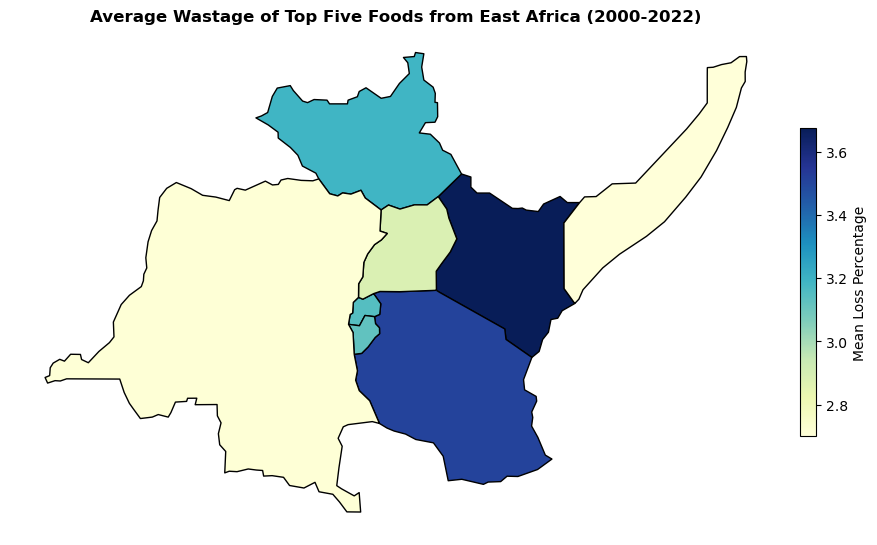

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
geo_ea_data.plot(
    column='average_loss_percentage', 
    cmap='YlGnBu', 
    legend=True, 
    legend_kwds={
        'label': "Mean Loss Percentage",
        'orientation': "vertical",
        'shrink': 0.5,            
        'pad': 0.02,              
    },
    ax=ax,
    edgecolor='black'
)

ax.set_title('Average Wastage of Top Five Foods from East Africa (2000-2022)', fontsize=12, fontweight='bold')
ax.axis('off')
plt.savefig('eamap1.png', dpi=600, bbox_inches='tight')
plt.show()

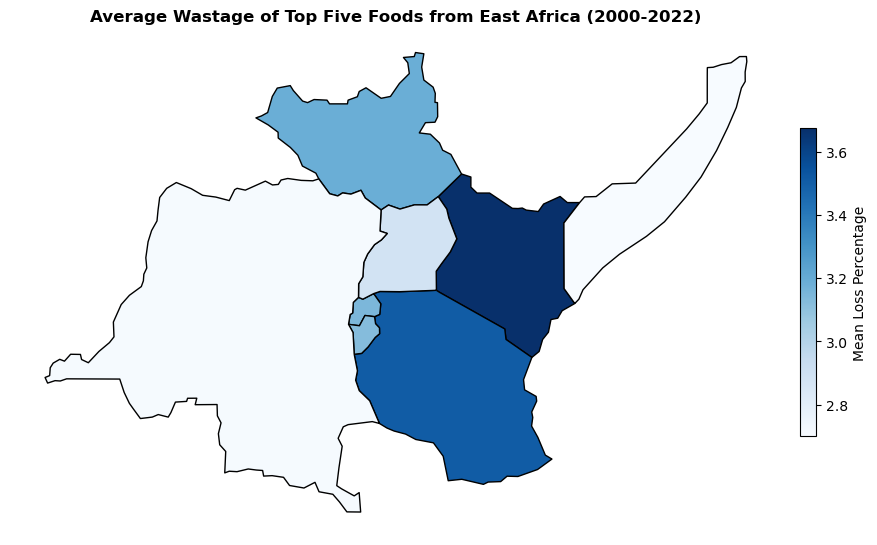

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
geo_ea_data.plot(
    column='average_loss_percentage', 
    cmap='Blues', 
    legend=True, 
    legend_kwds={
        'label': "Mean Loss Percentage",
        'orientation': "vertical",
        'shrink': 0.5,            
        'pad': 0.02,              
    },
    ax=ax,
    edgecolor='black'
)

ax.set_title('Average Wastage of Top Five Foods from East Africa (2000-2022)', fontsize=12, fontweight='bold')
ax.axis('off')
plt.savefig('eamap2.png', dpi=600, bbox_inches='tight')
plt.show()

In [19]:
#average wastage of the top five foods by east african countries through years
top_foods_wastage = ea_data_top.groupby(['year', 'commodity'])['loss_percentage'].mean().reset_index()
top_foods_wastage

,year,commodity,loss_percentage
0,2000,Maize (corn),3.251615
1,2000,Millet,2.203195
2,2000,Rice,2.275450
3,2000,Sorghum,2.782020
4,2000,Wheat,3.091651
...,...,...,...
105,2021,Maize (corn),3.196279
106,2021,Millet,2.202694
107,2021,Rice,2.329143
108,2021,Sorghum,2.781024


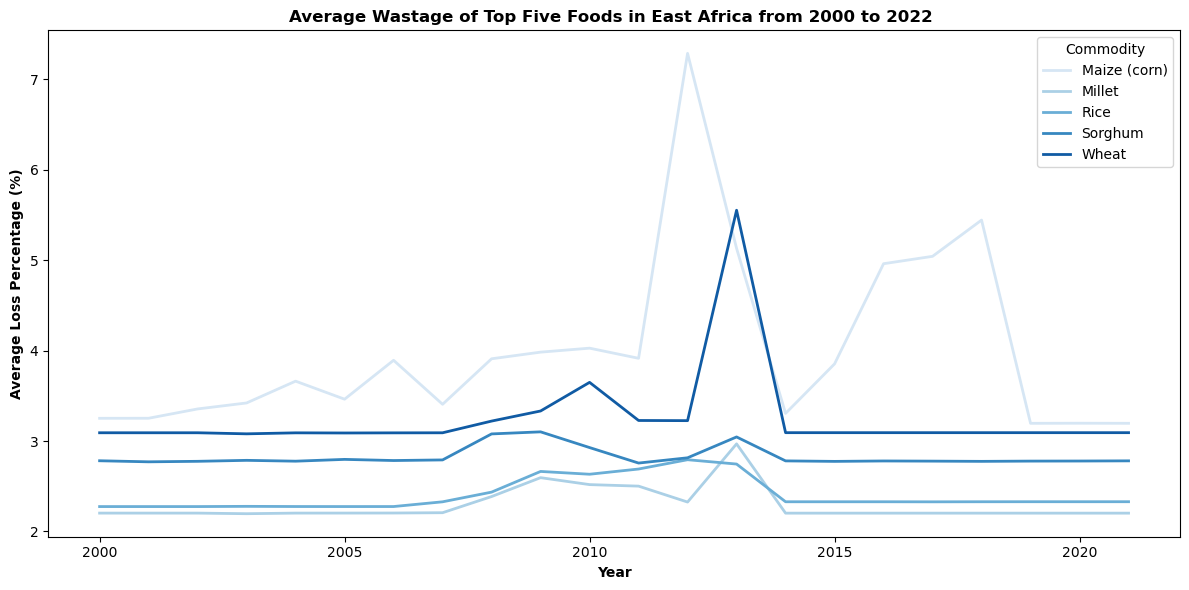

In [36]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_foods_wastage, 
             x='year', 
             y='loss_percentage', 
             hue='commodity',
             palette='Blues',
             linewidth=2.0)
plt.title('Average Wastage of Top Five Foods in East Africa from 2000 to 2022 ', fontsize=12, fontweight='bold')
plt.xlabel('Year', fontsize=10, fontweight='bold')
plt.ylabel('Average Loss Percentage (%)', fontsize=10, fontweight='bold')
plt.legend(title='Commodity', fontsize=10)
plt.tight_layout()
plt.savefig('lineplot1.png', dpi=600, bbox_inches='tight')
plt.show()

In [22]:
#activites that cause most wastage of the top five foods in east african countries
top_foods_wastage_activity = ea_data_top.groupby('activity')['loss_percentage'].count().sort_values(ascending=False).reset_index(name='count')
top_foods_wastage_activity.head()

,activity,count
0,Storage,1166
1,Transportation,1082
2,"Drying, Harvesting",685
3,"Shelling, Threshing",682
4,Winnowing,264


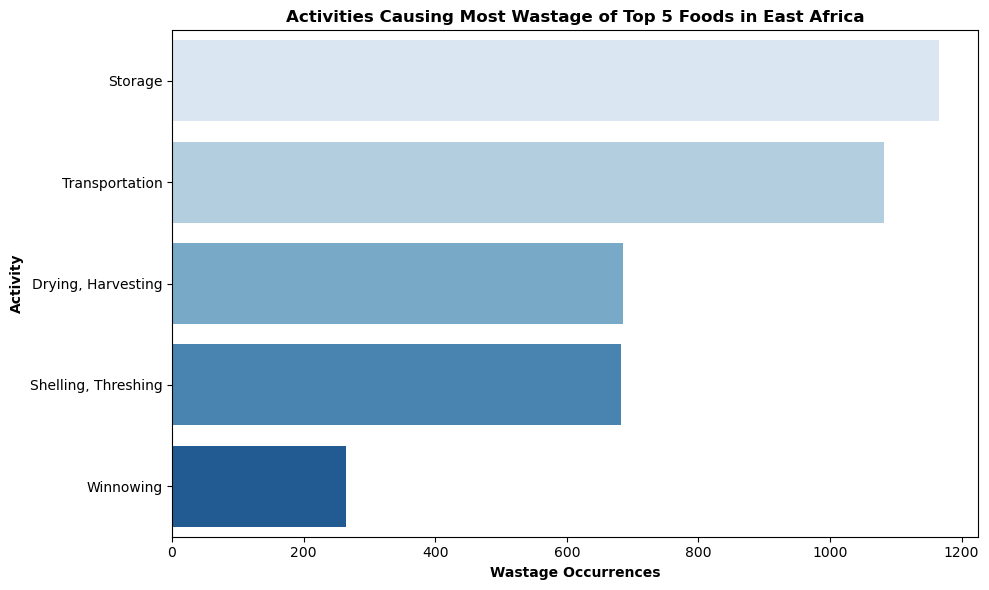

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_foods_wastage_activity.head(), 
            x='count', 
            y='activity', 
            hue='activity',
            palette='Blues',
            dodge=False,
            legend=False)

plt.title('Activities Causing Most Wastage of Top 5 Foods in East Africa', fontsize=12, fontweight='bold')
plt.xlabel('Wastage Occurrences', fontsize=10, fontweight='bold')
plt.ylabel('Activity', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

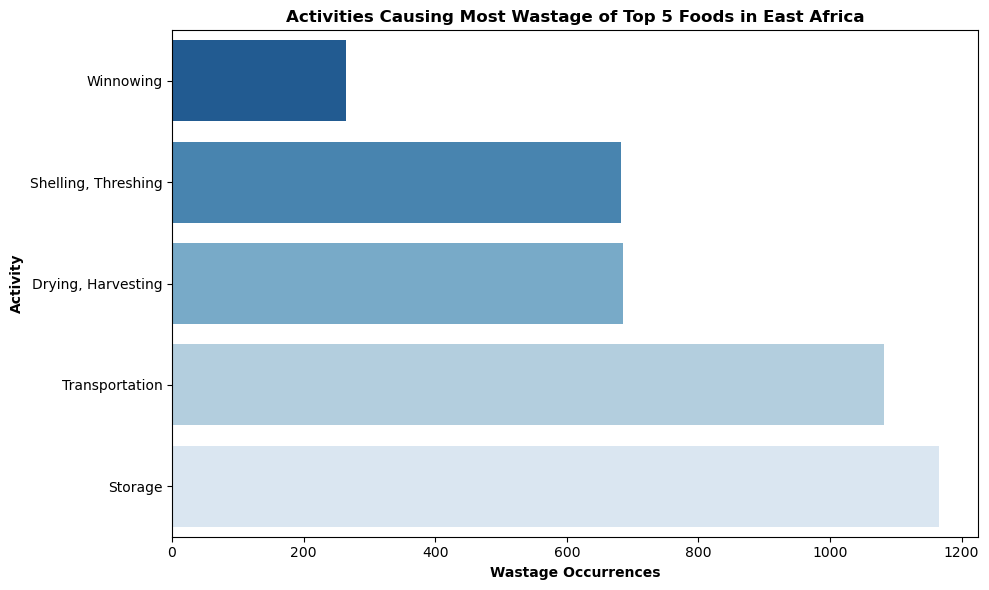

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_foods_wastage_activity.head(), 
            x='count', 
            y='activity', 
            hue='activity',
            palette='Blues',
            dodge=False,
            legend=False)

plt.title('Activities Causing Most Wastage of Top 5 Foods in East Africa', fontsize=12, fontweight='bold')
plt.xlabel('Wastage Occurrences', fontsize=10, fontweight='bold')
plt.ylabel('Activity', fontsize=10, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()